In [1]:
import pandas as pd
import dask as dd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.formula.api as smf
import statistics

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats

sns.set()

/usr/local/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [5]:
df = pd.read_csv('./data/JV_data_dist.csv')

df['da'] = pd.to_datetime(df['da'])
df = df.set_index('da', drop=True)

/var/folders/5h/tc1b2dhx483_cx6pj09_pyc80000gn/T/ipykernel_9229/3288028360.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(ot.index, ot['id'], linestyle = 'solid', marker='o')


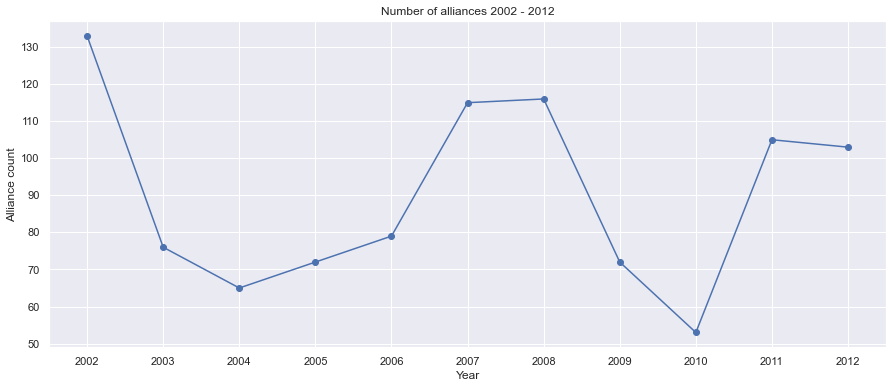

In [37]:
ot = pd.DataFrame(df['id'].groupby(df.index.to_period("Y").strftime('%Y')).agg('count'))

# fig, ax = plt.subplots()
# plt.plot(ot)
plt.figure(figsize = (15, 6))
plt.plot_date(ot.index, ot['id'], linestyle = 'solid', marker='o')
plt.xlabel('Year')
plt.xticks(ot.index)
plt.ylabel('Alliance count')
plt.title('Number of alliances 2002 - 2012')
plt.show()


In [39]:
ot.to_csv('./graph_data/ot.csv')

In [47]:
df.pdynamic.value_counts()

new_entrant    641
incumbent      348
Name: pdynamic, dtype: int64

In [43]:
ctdf = (df['pdynamic']
		.groupby([df.index.to_period("Y"), df['pdynamic'].values])
		.count()
		).reset_index().rename(columns={'level_1': 'categorical', 'pdynamic': 'ct'})

In [45]:
ctdf.to_csv('./graph_data/dynamic_ot.csv', index=False)

In [93]:
d_ot = pd.DataFrame(df['pdynamic'].groupby([(df.pdynamic), df.index.to_period("Y")]).count()).rename(columns={'pdynamic': 'ct'}).reset_index()

d_ot.to_csv('./graph_data/d_ot.csv', index=False)


In [118]:
df.columns

Index(['id', 'activity', 'activityc', 'jvinc', 'jvindustry', 'jvstatus', 'p',
       'pbl', 'pbuss', 'sicp', 'sic', 'sicpdesc', 'psic', 'psicp', 'nump',
       'jvf', 'jvtype', 'rndf', 'pemp', 'pbussource', 'hitechc', 'crlic',
       'crtech', 'techniquec', 'techtr', 'ppubc', 'snation_partal',
       'cr_bor_part', 'mfgf', 'natc', 'jvemp', 'saf', 'p1name', 'p1sicp',
       'p2name', 'p2sicp', 'p3name', 'p3sicp', 'p4name', 'p4sicp', 'p5name',
       'p5sicp', 'p6name', 'p6sicp', 'p7name', 'p7sicp', 'p8name', 'p8sicp',
       'p9name', 'p9sicp', 'pdynamic', 'ddist_int', 'ddist_abs', 'ddist_bin',
       'ddist_year', 'p1emp', 'p2emp', 'p3emp', 'p4emp', 'p5emp', 'p6emp',
       'p7emp', 'p8emp', 'p9emp', 'known_emp', 'known_allemp',
       'avg_emp_pp_log', 'avg_emp_pp', 'emp_min', 'public_count'],
      dtype='object')

<AxesSubplot:xlabel='pdynamic', ylabel='ddist_int'>

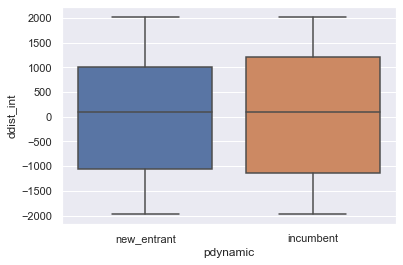

In [122]:
sns.boxplot(data=df, y='ddist_int', x='pdynamic')

In [112]:
box = pd.DataFrame(df[df.pdynamic == 'new_entrant'][['pdynamic', 'ddist_year']]).reset_index(drop=True)
box = box.append((df[df.pdynamic == 'incumbent'][['pdynamic', 'ddist_year']]).reset_index(drop=True)).reset_index(drop=True)

/var/folders/5h/tc1b2dhx483_cx6pj09_pyc80000gn/T/ipykernel_9229/4280278642.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  box = box.append((df[df.pdynamic == 'incumbent'][['pdynamic', 'ddist_year']]).reset_index(drop=True)).reset_index(drop=True)


In [115]:
box.to_csv('./graph_data/box.csv', index=False)